## Assess Columns  Cleaning and analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('updatedDatasets/Update1.csv')

In [3]:
df['AssessJobIndustry'].unique()

array(['Very important', nan, 'Somewhat important', 'Important',
       'Not very important', 'Not at all important'], dtype=object)

In [4]:
df.iloc[:,21:34].head()

,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct
0,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Somewhat important,Not very important
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat important,Somewhat important,Somewhat important,Important,Important,Very important,Important,Very important,Important,Somewhat important,Very important,Important,Very important
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.DataFrame(df['AssessJobIndustry'].value_counts())

,AssessJobIndustry
Important,7391
Somewhat important,6637
Not very important,3721
Very important,3521
Not at all important,860


In [33]:
#When you're assessing potential jobs to apply to, how important are each of the following to you? 
#AssessjobIndustry : The industry that I'd be working in
#AssessJobRole : The specific role or job title I'd be applying for
#AssessJobExp : The experience level called for in the job description
#AssessJobDept : 
#AssessJobTech : 


In [6]:
# values = df['AssessJobIndustry'].value_counts()
# labels = df['AssessJobIndustry'].value_counts().index
# plt.pie(values , labels= labels,startangle=90, shadow=True)

In [7]:
def assess_score(cols):
    score = 0
    
    for x in cols:
        if pd.isnull(x):
            score += 0
        elif x == 'Not at all important':
            score += 0.5
        elif x == 'Not very important':
            score += 1
        elif x == 'Somewhat important':
            score += 1.5
        elif x == 'Important':
            score += 2
        else:
            score += 2.5
                    
    return score

In [8]:
temp = df.iloc[:,20:34].apply(assess_score,axis=1)

In [9]:
temp[:5]

0    31.5
1     0.0
2     0.0
3    28.5
4     0.0
dtype: float64

In [10]:
df['Assess_Scoring']=temp

In [18]:
temp=df.drop(df.iloc[:,20:34],axis=1)
temp['Assess_Scoring'].replace({0:np.nan}, inplace=True)

In [12]:
temp[temp['Assess_Scoring']!=0]['Assess_Scoring'].count()

32803

<AxesSubplot:xlabel='CareerSatisfaction', ylabel='Assess_Scoring'>

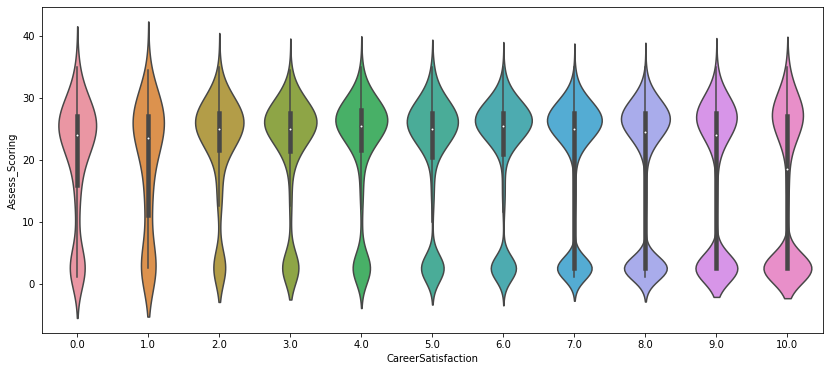

In [32]:
plt.figure(figsize =(14,6))
sns.violinplot(data=temp,y='Assess_Scoring',x='CareerSatisfaction')

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Assess_Scoring'>

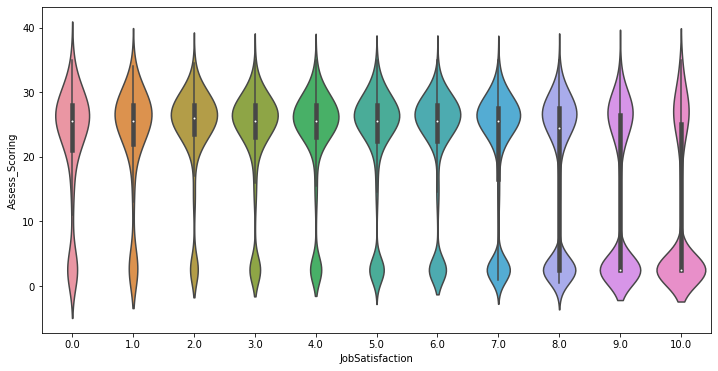

In [31]:
plt.figure(figsize =(12,6))
sns.violinplot(data=temp,y='Assess_Scoring',x='JobSatisfaction')

In [19]:
df.to_csv('updatedDatasets/Update2.csv')